In [1]:
import sys
import os
import numpy as np

tree = '/users/dangoldberg/desktop/code/tlrl/'
sys.path.append(tree+'Deep-Learning-TensorFlow/')

from yadlt.models.boltzmann import rbm


In [13]:
RBM = rbm.RBM(
            num_hidden = 36, 
            visible_unit_type='bin',
            name='rbm', 
            loss_func='mse', 
            learning_rate=0.05,
            regcoef=5e-4, 
            regtype='none', 
            gibbs_sampling_steps=2,
            batch_size=32, 
            num_epochs=1000, 
            stddev=0.1
            )



In [3]:
from yadlt import utils

In [19]:
N = 20000
num_visible = 36

vs = []

for n in range(N):
    ones = np.random.binomial(num_visible,0.5)
    v = np.random.permutation(np.concatenate([np.ones(ones),np.zeros(num_visible-ones)]))
    
    vs.append(v)

vs = np.stack(vs)

In [20]:
vs_train = vs[:N-3000]
vs_test = vs[N-3000:]

In [ ]:
RBM.fit(vs_train,vs_test)

Tensorboard logs dir for this run is /Users/dangoldberg/.yadlt/logs/run10


 14%|█▍        | 145/1000 [01:36<08:51,  1.61it/s]

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6087: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 36 x 256)
  '(shape is %d x %d)' % inp.shape[::-1])


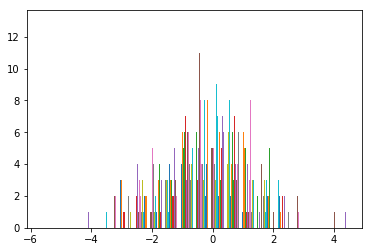

In [18]:
from matplotlib import pyplot as plt

plt.hist(RBM.get_parameters()['W'],bins=20)
plt.show()

In [69]:
%run /Users/dangoldberg/desktop/code/tlrl/tlrl/Deep-Learning-TensorFlow/cmd_line/boltzmann/run_rbm.py

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Start training...
Tensorboard logs dir for this run is /Users/dangoldberg/.yadlt/logs/run3



100%|██████████| 10/10 [01:39<00:00,  9.68s/it]


In [156]:
def generate_v(num_visible,theta=0.5):

    ones = np.random.binomial(num_visible,theta)
    v = np.random.permutation(np.concatenate([np.ones(ones),np.zeros(num_visible-ones)]))

    return v

v = generate_v(num_visible,0.2)
v = v.astype(np.float32).reshape(1,-1)
v

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [151]:
v

(<tf.Tensor 'Sigmoid_14:0' shape=(1, 36) dtype=float32>,
 <tf.Tensor 'Relu_9:0' shape=(?, 36) dtype=float32>,
 <tf.Tensor 'Sigmoid_15:0' shape=(1, 36) dtype=float32>,
 <tf.Tensor 'Sigmoid_16:0' shape=(1, 36) dtype=float32>,
 <tf.Tensor 'Relu_10:0' shape=(?, 36) dtype=float32>)